In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('../data/EC_8_delay.csv', index_col=0)

In [6]:
df

,Zürich HB_ad,Zürich HB_dd,Basel SBB_ad,Basel SBB_dd,Basel Bad Bf_ad,Basel Bad Bf_dd,Freiburg(Breisgau) Hbf_ad,Freiburg(Breisgau) Hbf_dd,Baden-Baden_ad,Baden-Baden_dd,...,Bremen Hbf_ad,Bremen Hbf_dd,Hamburg-Harburg_ad,Hamburg-Harburg_dd,Hamburg Hbf_ad,Hamburg Hbf_dd,Hamburg Dammtor_ad,Hamburg Dammtor_dd,Hamburg-Altona_ad,Hamburg-Altona_dd
2019-01-01,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,10.0,10.0,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,1.0,1.0,38.0,40.0,41.0,40.0,...,34.0,34.0,32.0,0.0,35.0,0.0,42.0,0.0,40.0,0.0
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,0.0,0.0,4.0,5.0,4.0,4.0,5.0,5.0,1.0,1.0,...,14.0,14.0,9.0,0.0,12.0,0.0,14.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,...,7.0,6.0,6.0,6.0,9.0,11.0,0.0,0.0,0.0,0.0
2021-09-09,0.0,2.0,0.0,0.0,0.0,2.0,3.0,4.0,NaN,NaN,...,26.0,32.0,36.0,36.0,39.0,39.0,0.0,0.0,0.0,0.0
2021-09-10,0.0,1.0,4.0,7.0,8.0,12.0,11.0,12.0,NaN,NaN,...,9.0,9.0,62.0,62.0,66.0,67.0,69.0,69.0,69.0,0.0
2021-09-11,0.0,0.0,0.0,0.0,4.0,7.0,7.0,7.0,NaN,NaN,...,14.0,14.0,16.0,9.0,15.0,15.0,16.0,16.0,16.0,0.0


<AxesSubplot:>

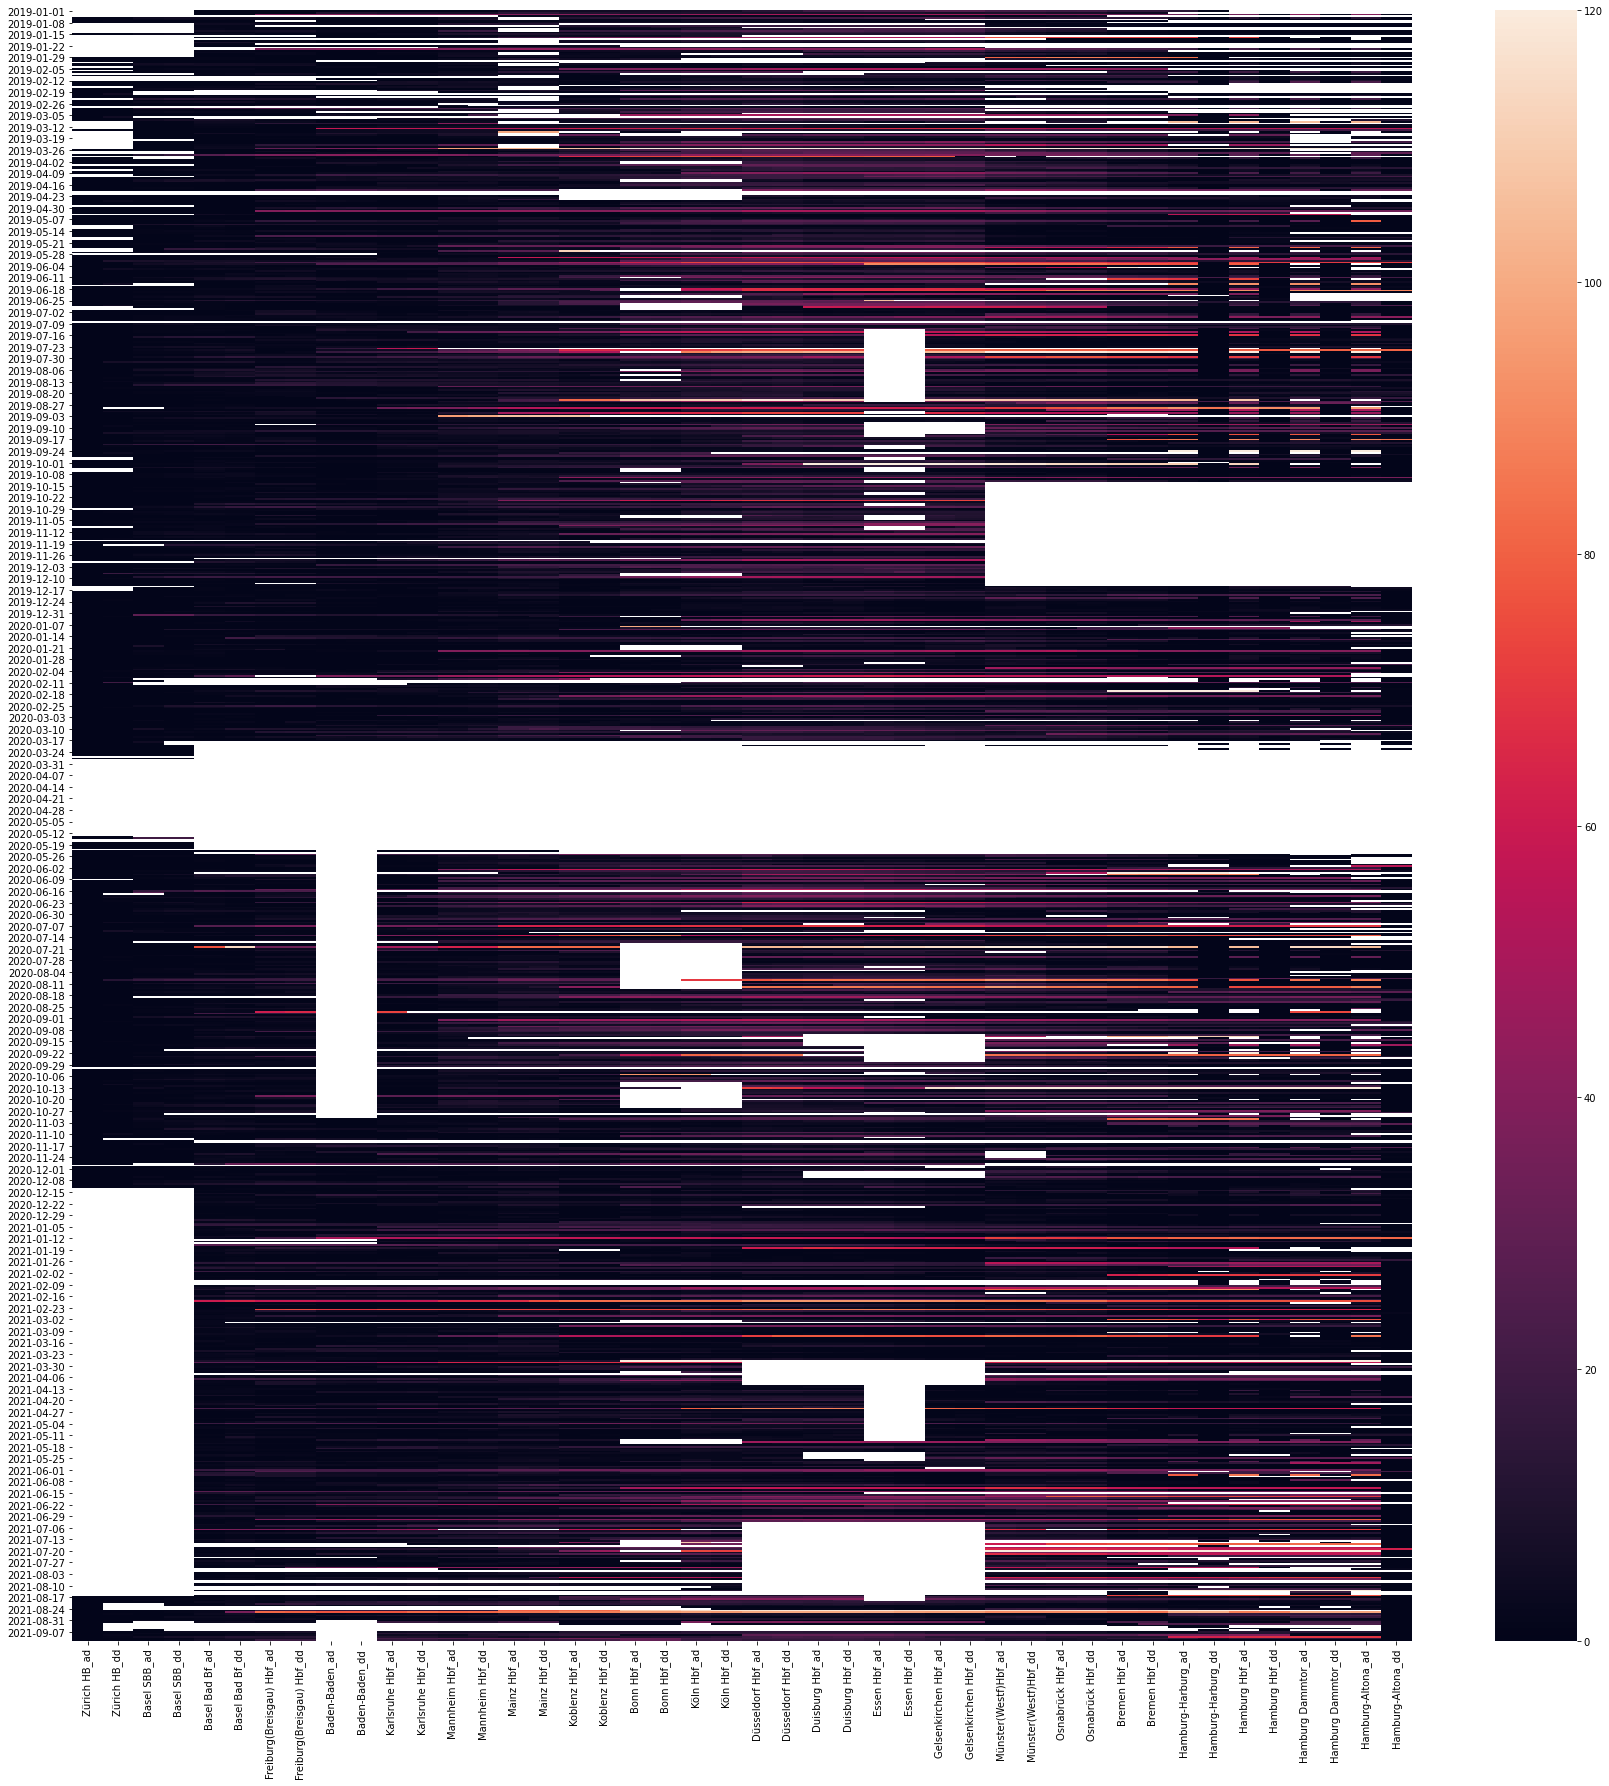

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(df, cbar=True, vmax=120)

In [16]:
df.max()

Zürich HB_ad                   0.0
Zürich HB_dd                  20.0
Basel SBB_ad                  29.0
Basel SBB_dd                  29.0
Basel Bad Bf_ad               76.0
Basel Bad Bf_dd              114.0
Freiburg(Breisgau) Hbf_ad     82.0
Freiburg(Breisgau) Hbf_dd     80.0
Baden-Baden_ad                77.0
Baden-Baden_dd                77.0
Karlsruhe Hbf_ad              77.0
Karlsruhe Hbf_dd              82.0
Mannheim Hbf_ad               97.0
Mannheim Hbf_dd              100.0
Mainz Hbf_ad                 107.0
Mainz Hbf_dd                 108.0
Koblenz Hbf_ad               112.0
Koblenz Hbf_dd               107.0
Bonn Hbf_ad                  193.0
Bonn Hbf_dd                  192.0
Köln Hbf_ad                  197.0
Köln Hbf_dd                  191.0
Düsseldorf Hbf_ad            138.0
Düsseldorf Hbf_dd            138.0
Duisburg Hbf_ad              130.0
Duisburg Hbf_dd              130.0
Essen Hbf_ad                 130.0
Essen Hbf_dd                 130.0
Gelsenkirchen Hbf_ad